# Importing necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook
import os
import matplotlib.image as mpimg
import datetime

# Setting up report period

In [411]:
year_= 1981 # The year of the report time
quarter = 4 # The quarter of the report time
start_date = str(year_) + '-01-01' # The start date of the year
last_year = year_-1 # is used for the calculation of last quarter values of the last year

# Table titles based on quarters

In [412]:
if quarter == 1:
    table_index = ['January','February','March']
    quarter_start = str(year_) + '-01-01'
    end_date = str(year_) + '-03-31'
    last_month = 3
    quarter_tuples = [('1',str(year_) + '-03-01')] 
elif quarter == 2:
    table_index = ['January','February','March','April','May','June']
    quarter_start = str(year_) + '-04-01'
    end_date = str(year_) + '-06-30'
    last_month = 6
    quarter_tuples = [('1',str(year_) + '-03-01'),('2',str(year_) + '-06-01')]
elif quarter == 3:
    table_index = ['January','February','March','April','May','June','July','August','September']
    quarter_start = str(year_) + '-07-01'
    end_date = str(year_) + '-09-30'
    last_month = 9
    quarter_tuples = [('2',str(year_) + '-06-01'),('3',str(year_) + '-09-01')]
else:
    table_index = ['January','February','March','April','May','June','July','August','September','October','November','December']
    quarter_start = str(year_) + '-10-01'
    end_date = str(year_) + '-12-31'
    last_month = 12
    quarter_tuples = [('3',str(year_) + '-09-01'),('4',str(year_) + '-12-01')]

# Reading .csv files
u : Oil Production, 
cu: Gas Production, 
ce: Gas Injection,
se: Water Injection,
r: Recycle,
a: Intervention,
urt: Monthly Production Report,
tah: Monthly Prediction Report


In [413]:
#,parse_dates=[1],dayfirst=True

dfu = pd.read_csv('X_Oil_Production.csv',sep =';', encoding='latin1',parse_dates = [1],dayfirst = True)
dfcu = pd.read_csv('X_Gas_Production.csv',sep =';', encoding='latin1',parse_dates = [1],dayfirst = True)
dfce = pd.read_csv('X_Gas_Injection.csv',sep =';', encoding='latin1',parse_dates = [1],dayfirst = True)
dfse = pd.read_csv('X_Water_Injection.csv',sep =';', encoding='latin1',parse_dates = [1],dayfirst = True)
df_Header = pd.read_csv("X_HeaderID.csv",sep = ';',encoding = 'latin1')
dfa = pd.read_csv('X_Intervention.csv',sep = ';', encoding='latin1',parse_dates = [1])
urt = pd.read_csv('X_Monthly_Production_Report.csv',sep = ';', encoding='latin1',parse_dates = [0],dayfirst = True)
tah = pd.read_csv("X_Production_Prediction.csv",sep =';' , encoding='latin1',parse_dates = [0],dayfirst = True)
df_shut_in = pd.read_csv('X_Shut_In_Wells.csv',sep = ';')

dfu['month'] = dfu.Date_.dt.month;
dfu['year'] = dfu.Date_.dt.year;
dfu['days_in_month'] = dfu.Date_.dt.days_in_month
dfu['quarter'] = dfu.Date_.dt.quarter

dfcu['month'] = dfcu.Date_.dt.month;
dfcu['year'] = dfcu.Date_.dt.year;
dfcu['quarter'] = dfcu.Date_.dt.quarter

dfce['month'] = dfce.Date_.dt.month;
dfce['year'] = dfce.Date_.dt.year;
dfce['quarter'] = dfce.Date_.dt.quarter

dfse['month'] = dfse.Date_.dt.month;
dfse['year'] = dfse.Date_.dt.year;
dfse['quarter'] = dfse.Date_.dt.quarter
dfse = dfse[dfse.Monthly_Water_Injection_bbl > 0]

dfa.Date_ = pd.to_datetime(dfa.Date_, dayfirst = True)
dfa['month'] = dfa.Date_.dt.month;
dfa['year'] = dfa.Date_.dt.year;

#urt.Date_ = pd.to_datetime(urt.Date_, dayfirst = True)
urt['month'] = urt.Date_.dt.month;
urt['year'] = urt.Date_.dt.year;

tah['month'] = tah.Date_.dt.month;
tah['year'] = tah.Date_.dt.year;

C:\Users\tinceisci\AppData\Local\Temp\ipykernel_564992\1649867050.py:8: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dfa = pd.read_csv('X_Intervention.csv',sep = ';', encoding='latin1',parse_dates = [1])




# Sums by Quarter



In [414]:
donem_oil = dfu[dfu.Date_.between(quarter_start,end_date)].Monthly_Oil_Production_bbl.sum()
donem_su = dfu[dfu.Date_.between(quarter_start,end_date)].Monthly_Water_Production_bbl.sum()
donem_CO2 = dfcu[dfcu.Date_.between(quarter_start,end_date)].Monthly_Gas_Production_Mscf.sum()/1000
donem_CO2enj = np.round(dfce[dfce.Date_.between(quarter_start,end_date)].Monthly_Gas_Injection_MMscf.sum(),3)
donem_suenj = dfse[dfse.Date_.between(quarter_start,end_date)].Monthly_Water_Injection_bbl.sum()



# Cumulatives



In [415]:
cum_oil = dfu[dfu.Date_ <= end_date].Monthly_Oil_Production_bbl.sum()
cum_su = dfu[dfu.Date_ <= end_date].Monthly_Water_Production_bbl.sum()
cum_CO2 = round(dfcu[dfcu.Date_ <= end_date].Monthly_Gas_Production_Mscf.sum()/1e3,2)
cum_CO2enj = round(dfce[dfce.Date_ <= end_date].Monthly_Gas_Injection_MMscf.sum(),2)
cum_suenj = dfse[dfse.Date_ <= end_date].Monthly_Water_Injection_bbl.sum()

In [416]:
print(f"Cumulative Oil Production       : {cum_oil} bbl")
print(f"Cumulative Water Production     : {cum_su} bbl")
print(f"Cumulative Gas Production       : {cum_CO2} MMscf")
print(f"Cumulative Gas Injection        : {cum_CO2enj} MMscf")
print(f"Cumulative Water Injection      : {cum_suenj} bbl")


Cumulative Oil Production       : 88912966 bbl
Cumulative Water Production     : 17817836 bbl
Cumulative Gas Production       : 314009.21 MMscf
Cumulative Gas Injection        : 379077.48 MMscf
Cumulative Water Injection      : 7963430.0 bbl




# Active Well Count




In [417]:
UKS = dfu[dfu.Date_.between(start_date,end_date)].groupby('month')['Monthly_Oil_Production_bbl'].count()
CEKS = dfce[dfce.Date_.between(start_date,end_date)].groupby('month')['Monthly_Gas_Injection_MMscf'].count()
SUEKS = dfse[dfse.Date_.between(start_date,end_date)].groupby('month')['Monthly_Water_Injection_bbl'].count()
Active_Well_Counts = pd.merge(pd.merge(UKS,CEKS,how='outer',on='month'),SUEKS,how='outer',on='month');
Active_Well_Counts.columns = ['Production_Well_Count','Gas_Injection_Well_Count','Water_Injection_Well_Count']

# Well count for the last month

In [418]:
UKS_lm = dfu[(dfu.year == year_) & (dfu.month == last_month)]['Well'].value_counts().sum()
GEKS_lm = dfce[(dfce.year == year_) & (dfce.month == last_month)]['Well'].value_counts().sum()
SUEKS_lm = dfse[(dfse.year == year_) & (dfse.month == last_month)]['Well'].value_counts().sum()



# Monthly Productions



In [419]:
O_W_Production = dfu[dfu.Date_.between(start_date,end_date)].groupby('month')[['Monthly_Oil_Production_bbl','Monthly_Water_Production_bbl']].sum();
Gas_Production = np.round(dfcu[dfcu.Date_.between(start_date,end_date)].groupby('month')['Monthly_Gas_Production_Mscf'].sum()/1000,2)
Prods = pd.merge(O_W_Production,Gas_Production,how='outer',on='month')
Prods.columns = ['Oil_Production_bbl', 'Water_Production_bbl','Gas_Production_MMscf']
SubSu = dfse[dfse.Date_.between(start_date,end_date)].groupby('month')['Monthly_Water_Injection_bbl'].sum()



# Gas Injection Total



In [420]:
Recycle = urt[urt.Date_.between(start_date,end_date)].groupby('month')[['Gas_Field','Recycle_F2','Recycle_F6']].sum()
Recycle['Total_Gas_Injection_MMscf'] = Recycle.Gas_Field + Recycle.Recycle_F2 + Recycle.Recycle_F6

# Well Workovers

In [421]:
WO=dfa[(dfa.Date_.between(start_date,end_date))  & (dfa['Rig_Type'].isin(['RP','SV','ID']))];
ID = WO[WO.Rig_Type == 'ID'].groupby('month')['Rig_Type'].count();
RP = WO[WO.Rig_Type.isin(['RP','SV'])].groupby('month')['Rig_Type'].count();

# KPI Table

In [422]:
Sub1 = pd.merge(Active_Well_Counts,Prods,how='inner',on='month')
Sub2 = pd.merge(Sub1,Recycle,how='inner',on='month')
Sub3 = pd.merge(Sub2,SubSu,how='outer',on='month')
Sub4 = pd.merge(left = ID,right = RP,how = 'inner',on = 'month', suffixes = ('_ID', '_RP'));
KPIs = pd.merge(left = Sub3,right = Sub4,how = 'inner',on = 'month');

In [423]:
KPIs.index = table_index
KPIs

,Production_Well_Count,Gas_Injection_Well_Count,Water_Injection_Well_Count,Oil_Production_bbl,Water_Production_bbl,Gas_Production_MMscf,Gas_Field,Recycle_F2,Recycle_F6,Total_Gas_Injection_MMscf,Monthly_Water_Injection_bbl,Rig_Type_ID,Rig_Type_RP
January,164,36,1,93817,44125,533.90,176.5,467.8,242.9,887.2,4995.0,15,166
February,159,36,1,90059,33284,502.32,0.0,392.1,229.3,621.4,1403.0,10,190
March,152,36,1,79517,26254,439.37,149.4,373.8,275.9,799.1,867.0,17,199
April,159,36,1,81371,23043,444.67,177.4,333.9,250.4,761.7,869.0,19,235
May,153,36,1,80712,25346,459.90,206.2,343.4,284.2,833.8,6533.0,25,214
June,157,36,1,77216,28924,410.26,199.5,323.6,221.7,744.8,5152.0,16,194
July,158,37,1,86160,31346,468.70,206.0,400.7,206.2,812.9,5246.0,15,162
August,159,37,1,84734,29224,509.28,183.8,440.7,206.5,831.0,5360.0,23,110
September,161,37,3,85912,28292,544.63,206.6,462.2,232.3,901.1,4824.0,13,137


# Creating KPI table by quarter

In [424]:
#KPIs.to_excel('KPI_Table' + 'Quarter #' + str(quarter) + '.xlsx')

# Water Cut Map

In [425]:
def wc_division(wc):
    if wc <= 20:
        return '<=20%'
    elif wc > 20 and wc<= 40:
        return '20%-40%'
    elif wc > 40 and wc<= 60:
        return '40%-60%'
    elif wc > 60 and wc<= 80:
        return '60%-80%'
    elif wc > 80 and wc<= 99:
        return '80%-99%'
    else:
        return '100%'

In [426]:
dfu["WC_Division"] = np.vectorize(wc_division)(dfu.WC)

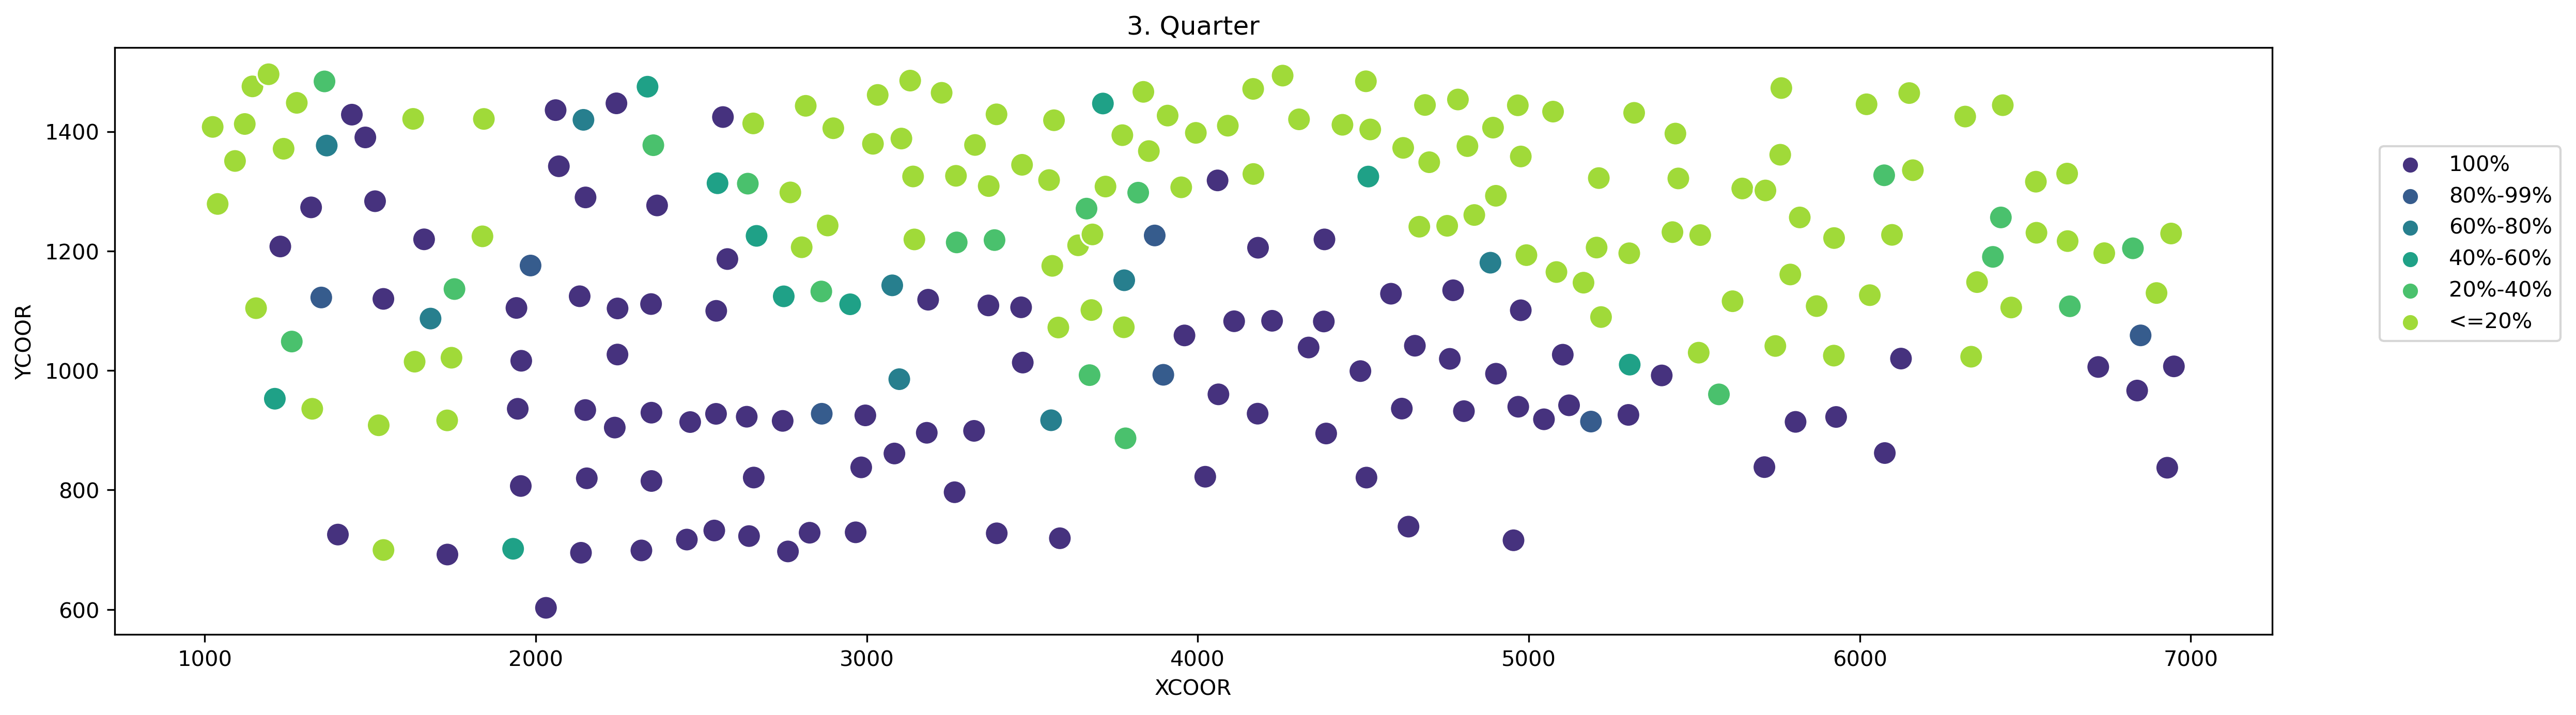

In [427]:
WC_Division = dfu[(dfu.year == year_) & (dfu.month == last_month)][["Well","WC_Division"]]
WC_Son = pd.concat([WC_Division,df_shut_in])
SubWC = pd.merge(df_Header[["Well","XCOOR","YCOOR"]],WC_Son,how='inner',on='Well')


fig, ax = plt.subplots(figsize=(17.96,4.918),dpi=300)
ax.set_title(str(quarter)+'. Quarter')
sns.scatterplot(
                data = SubWC, 
                x='XCOOR',
                y='YCOOR',
                hue='WC_Division',
                hue_order = ("100%",'80%-99%','60%-80%','40%-60%','20%-40%',"<=20%"),
                s=120,
                palette = 'viridis'
                )
plt.legend(loc = (1.05,0.5))

# EOR Regions Map

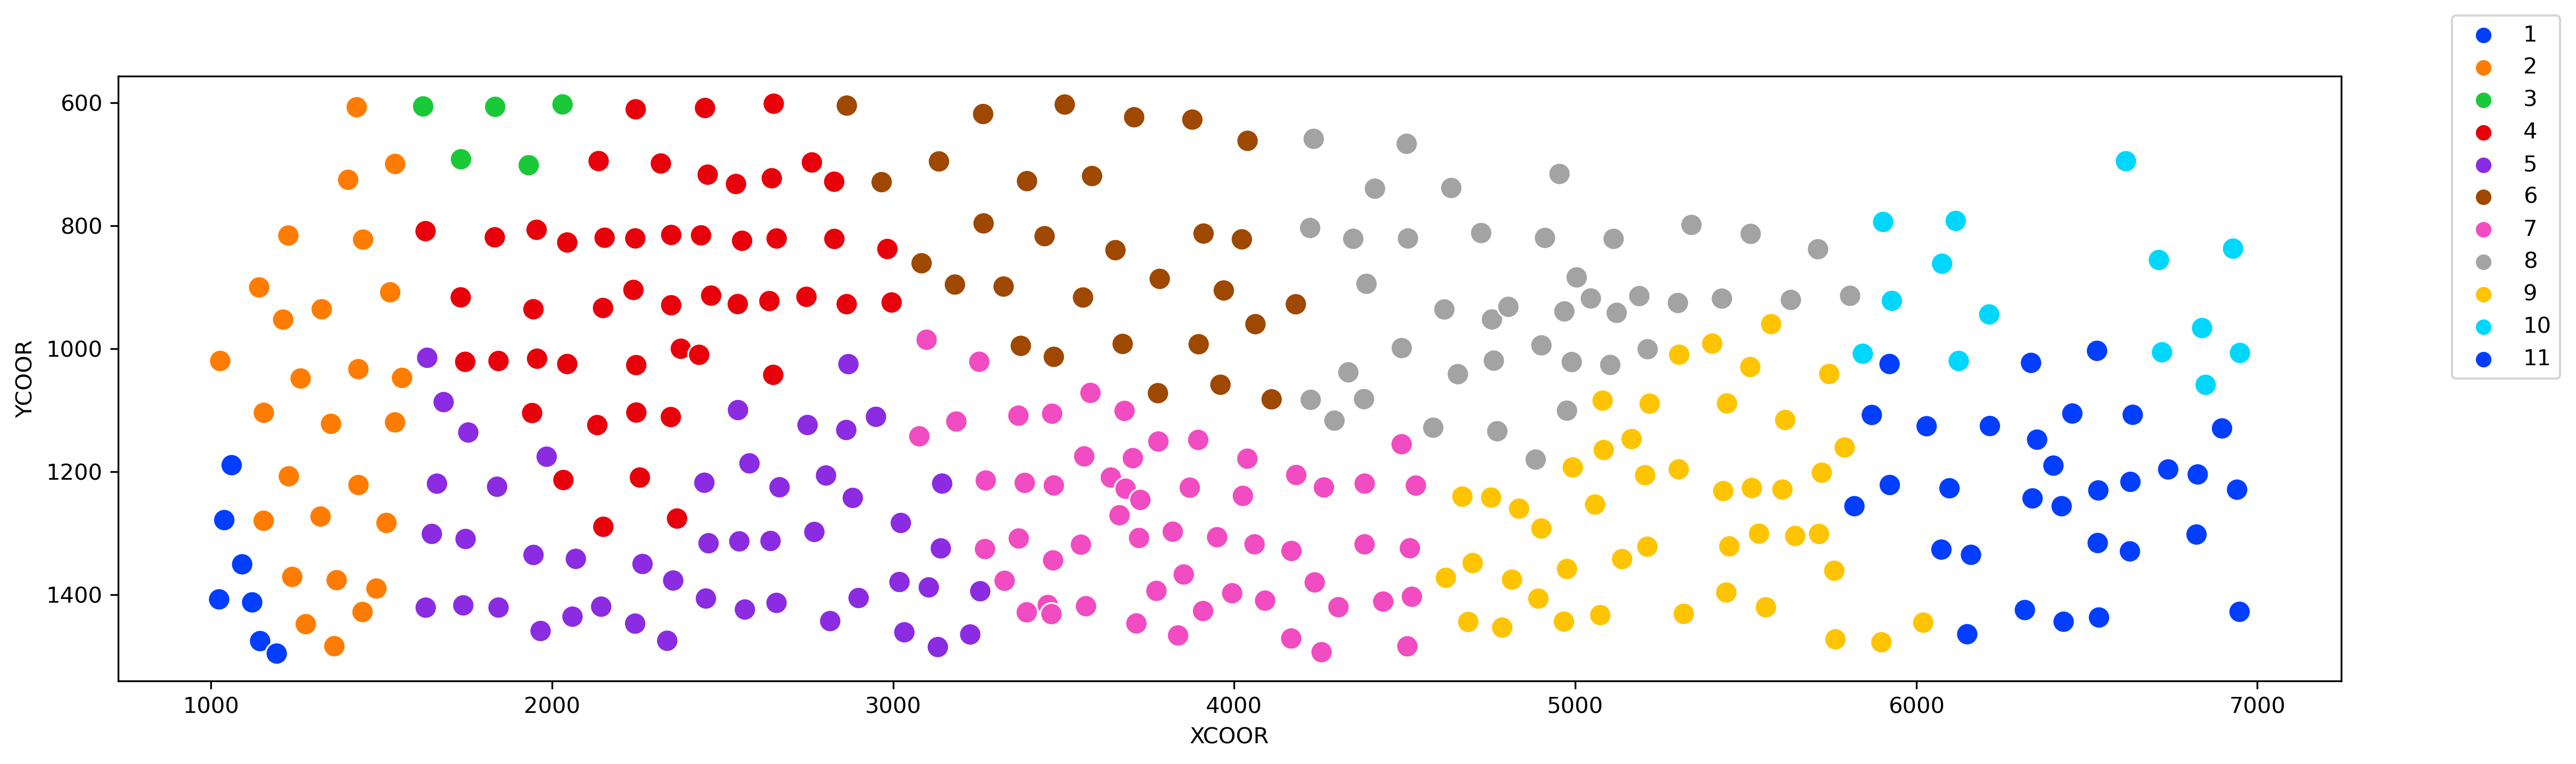

In [428]:
fig, ax = plt.subplots(figsize=(17.96,4.918),dpi=300)
sns.scatterplot(
                data = df_Header, 
                x='XCOOR',
                y='YCOOR',
                hue='EOR_Region',
                hue_order = (1,2,3,4,5,6,7,8,9,10,11),
                s=100,
                palette = 'bright'
               )
ax.invert_yaxis()
plt.legend(loc = (1.05,0.5))

# Monthly Oil Production by EOR_Regions

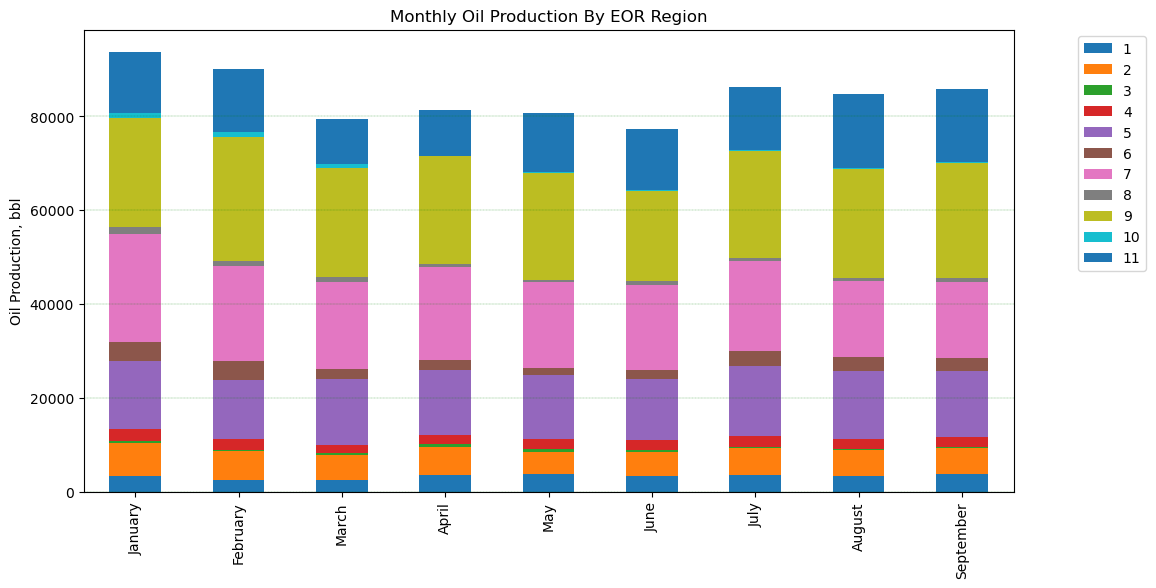

In [429]:
pu = pd.merge(df_Header,dfu[dfu.Date_.between(start_date,end_date)],how='inner',on='Well')
pu = pu[["EOR_Region","Date_","Monthly_Oil_Production_bbl"]]
pu = pd.pivot_table(pu[pu.Date_ >= start_date],index = "Date_",columns = "EOR_Region", aggfunc = 'sum')
pu.columns = pu.columns.droplevel(0)
pu.index = table_index
pu.plot(kind='bar', stacked=True,figsize = (12,6))
plt.title('Monthly Oil Production By EOR Region')
plt.ylabel('Oil Production, bbl')
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.2)
plt.legend(bbox_to_anchor=(1.15, 1))

# Monthly Water Production by EOR_Regions

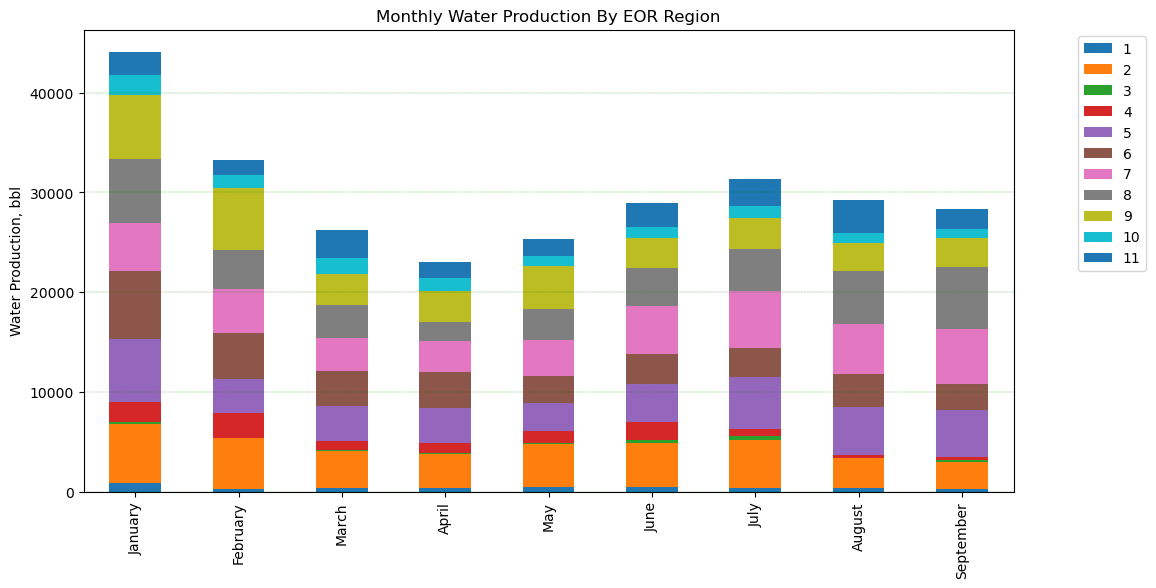

In [430]:
su = pd.merge(df_Header,dfu[dfu.Date_.between(start_date,end_date)],how='inner',on='Well')
su = su[["EOR_Region","Date_","Monthly_Water_Production_bbl"]]
su = pd.pivot_table(su[su.Date_>=start_date],index = "Date_",columns = "EOR_Region", aggfunc = 'sum')
su.columns = su.columns.droplevel(0)
su.index = table_index
su.plot(kind='bar', stacked=True,figsize = (12,6))
plt.title('Monthly Water Production By EOR Region')
plt.ylabel('Water Production, bbl')
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.2)
plt.legend(bbox_to_anchor=(1.15, 1))

# Monthly Gas Production by EOR_Regions

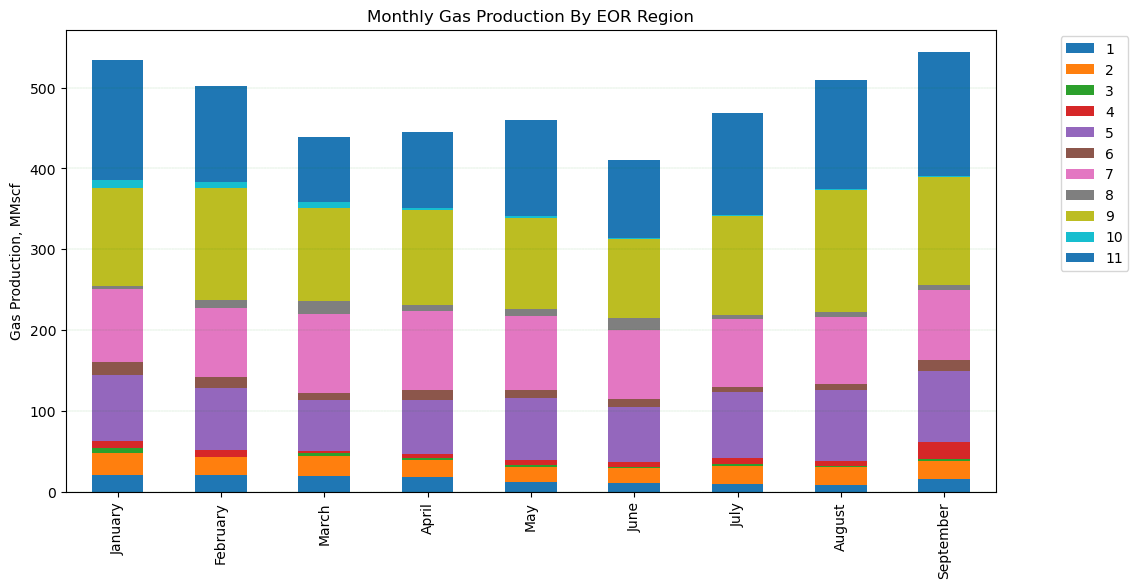

In [431]:
cu = pd.merge(df_Header,dfcu[dfcu.Date_.between(start_date,end_date)],how='inner',on='Well')
cu["Monthly_Gas_Uretimi_MMscf"] = cu.Monthly_Gas_Production_Mscf / 1000
cu = cu[["EOR_Region","Date_","Monthly_Gas_Uretimi_MMscf"]]
cu = pd.pivot_table(cu[cu.Date_>=start_date],index = "Date_",columns = "EOR_Region", aggfunc = 'sum')
cu.columns = cu.columns.droplevel(0)
cu.index = table_index
cu.plot(kind='bar', stacked=True,figsize = (12,6))
plt.title('Monthly Gas Production By EOR Region')
plt.ylabel('Gas Production, MMscf')
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.1)
plt.legend(bbox_to_anchor=(1.15, 1))

# Monthly Gas Injection by EOR_Regions

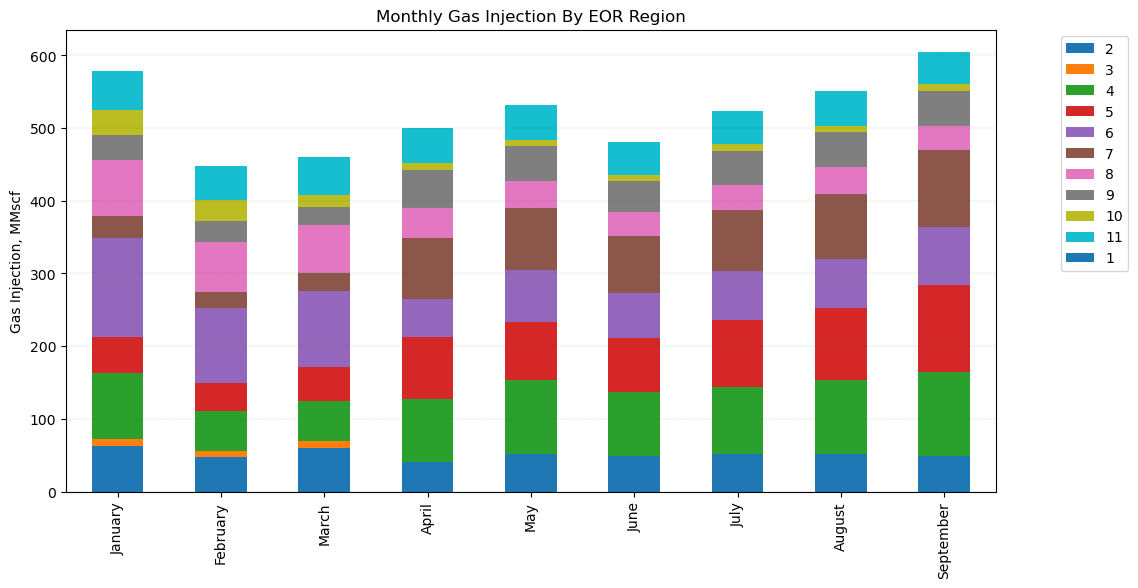

In [432]:
ce = pd.merge(df_Header,dfce[dfce.Date_.between(start_date,end_date)],how='inner',on='Well')
ce = ce[["EOR_Region","Date_","Monthly_Gas_Injection_MMscf"]]
ce = pd.pivot_table(ce[ce.Date_>=start_date],index = "Date_",columns = "EOR_Region", aggfunc = 'sum')
ce.columns = ce.columns.droplevel(0)
for i in range(1,12):
    if i not in list(ce.columns):
        ce[i] = 0
ce[[1,2,3,4,5,6,7,8,9,10,11]]
ce.index = table_index
ce.plot(kind='bar', stacked=True,figsize = (12,6))
plt.title('Monthly Gas Injection By EOR Region')
plt.ylabel('Gas Injection, MMscf')
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.1)
plt.legend(bbox_to_anchor=(1.15, 1))

# Gas Injection per Oil Production

In [433]:
Regional_unit_injection = round(ce * 1e6 / pu,1)
ce_total=ce.sum(axis=1)*1e6
pu_total=pu.sum(axis=1)
ce_pu = round(ce * 1e6 / pu,1)
ce_pu["total"] = ce_pu.sum(axis = 1)
ce_pu["ce_pu_avg"] = ce_total / pu_total
Normalised_unit_injection = round(ce_pu.drop(["total","ce_pu_avg"],axis=1).multiply(ce_pu.ce_pu_avg/ce_pu.total,axis='index'),1)

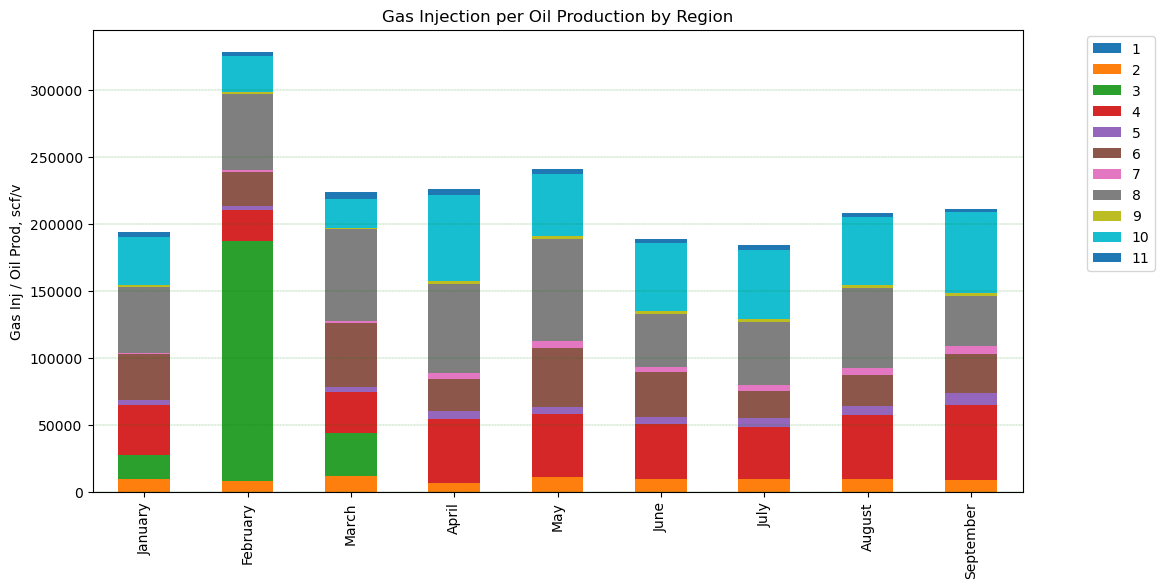

In [434]:
Regional_unit_injection.plot(kind='bar', stacked=True,figsize = (12,6))
plt.title('Gas Injection per Oil Production by Region')
plt.ylabel('Gas Inj / Oil Prod, scf/v')
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.2)
plt.legend(bbox_to_anchor=(1.15, 1))

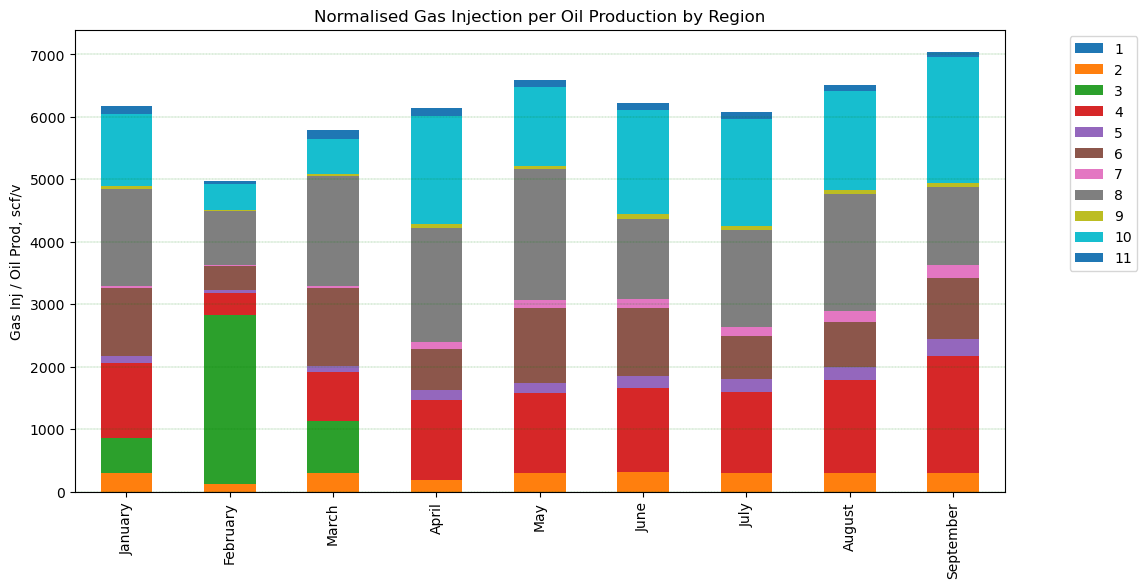

In [435]:
Normalised_unit_injection.plot(kind='bar', stacked=True,figsize = (12,6))
plt.title('Normalised Gas Injection per Oil Production by Region')
plt.ylabel('Gas Inj / Oil Prod, scf/v')
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.2)
plt.legend(bbox_to_anchor=(1.15, 1))

# Injection Table

In [436]:
enj_table = pd.merge(df_Header[['Well','EOR_Region']],dfce[dfce.Date_.between(quarter_start,end_date)][['Well','Date_','Daily_Gas_Injection_MMscf',"Pwh_psi"]]
                     ,how='inner',on='Well')
enj_table.EOR_Region = enj_table.EOR_Region.astype('int')
enj_table = enj_table.drop_duplicates()
enj_table

,Well,EOR_Region,Date_,Daily_Gas_Injection_MMscf,Pwh_psi
0,X-1514,11,1981-09-01,0.42,900.0
1,X-1514,11,1981-08-01,0.37,875.0
2,X-1514,11,1981-07-01,0.37,842.5
3,X-6867,11,1981-09-01,0.38,585.0
4,X-6867,11,1981-08-01,0.45,780.0
...,...,...,...,...,...
106,X-5423,2,1981-08-01,0.66,480.0
107,X-5423,2,1981-07-01,0.60,480.0
108,X-5861,2,1981-09-01,0.78,457.5
109,X-5861,2,1981-08-01,0.67,445.0


In [437]:
df_enj_table = pd.pivot(data = enj_table
                        , index = ['EOR_Region','Well']
                        , columns = 'Date_'
                        , values = ['Daily_Gas_Injection_MMscf','Pwh_psi'])

In [438]:
df_enj_table

Daily_Gas_Injection_MMscf                          Pwh_psi  \
Date_                             1981-07-01 1981-08-01 1981-09-01 1981-07-01   
EOR_Region Well                                                                 
2          X-2220                       0.43       0.40       0.46      815.0   
           X-5423                       0.60       0.66       0.77      480.0   
           X-5861                       0.63       0.67       0.78      410.0   
4          X-3632                       0.31       0.53       0.58      885.0   
           X-41                         0.55       0.65       0.74      415.0   
           X-5658                       0.49       0.50       0.57      702.5   
           X-6333                       0.57       0.66       0.75      360.0   
           X-7147                       0.57       0.59       0.67      435.0   
           X-8761                       0.51       0.47       0.54      670.0   
5          X-10421                      0.63       0.64       0.77      285.0   
           X-1383                       0.64       0.65       0.77      265.0   
           X-4528                       0.57       0.59       0.69      440.0   
           X-5059                       0.49       0.75       0.86      180.0   
           X-9186                       0.64       0.66       0.77      267.5   
6          X-2035                       0.49       0.46       0.44      640.0   
           X-2282                       0.42       0.40       0.44      710.0   
           X-3073                       0.25       0.42       0.65      980.0   
           X-5442                       0.52       0.62       0.68      495.0   
           X-9108                       0.49       0.50       0.57      595.0   
7          X-2375                       0.67       0.73       0.84      250.0   
           X-676                        0.57       0.62       0.74      320.0   
           X-7401                       0.60       0.66       0.71      400.0   
           X-7571                       0.22       0.24       0.30      900.0   
           X-8088                       0.66       0.70       0.80      210.0   
8          X-1499                       0.35       0.38       0.44      860.0   
           X-1602                       0.28       0.28       0.32      952.5   
           X-4269                       0.22       0.24       0.30      900.0   
           X-5802                       0.27       0.34       0.39      960.0   
9          X-2144                       0.50       0.55       0.64      615.0   
           X-2656                       0.40       0.42       0.33      800.0   
           X-5334                       0.28       0.28       0.22      952.5   
           X-7785                       0.35       0.35       0.38      872.5   
10         X-9021                       0.28       0.30       0.35      952.5   
11         X-1514                       0.37       0.37       0.42      842.5   
           X-6867                       0.41       0.45       0.38      780.0   
           X-7033                       0.45       0.50       0.43      715.0   
           X-9652                       0.26       0.27       0.32      965.0   

                                          
Date_              1981-08-01 1981-09-01  
EOR_Region Well                           
2          X-2220       800.0      800.0  
           X-5423       480.0      485.0  
           X-5861       445.0      457.5  
4          X-3632       550.0      575.0  
           X-41         400.0      410.0  
           X-5658       650.0      662.5  
           X-6333       380.0      400.0  
           X-7147       425.0      427.5  
           X-8761       685.0      700.0  
5          X-10421      275.0      247.5  
           X-1383       265.0      250.0  
           X-4528       440.0      435.0  
           X-5059       180.0      185.0  
           X-9186       280.0      300.0  
6          X-2035       745.0      855.0  
    

# Comparison of injection wells by quarter

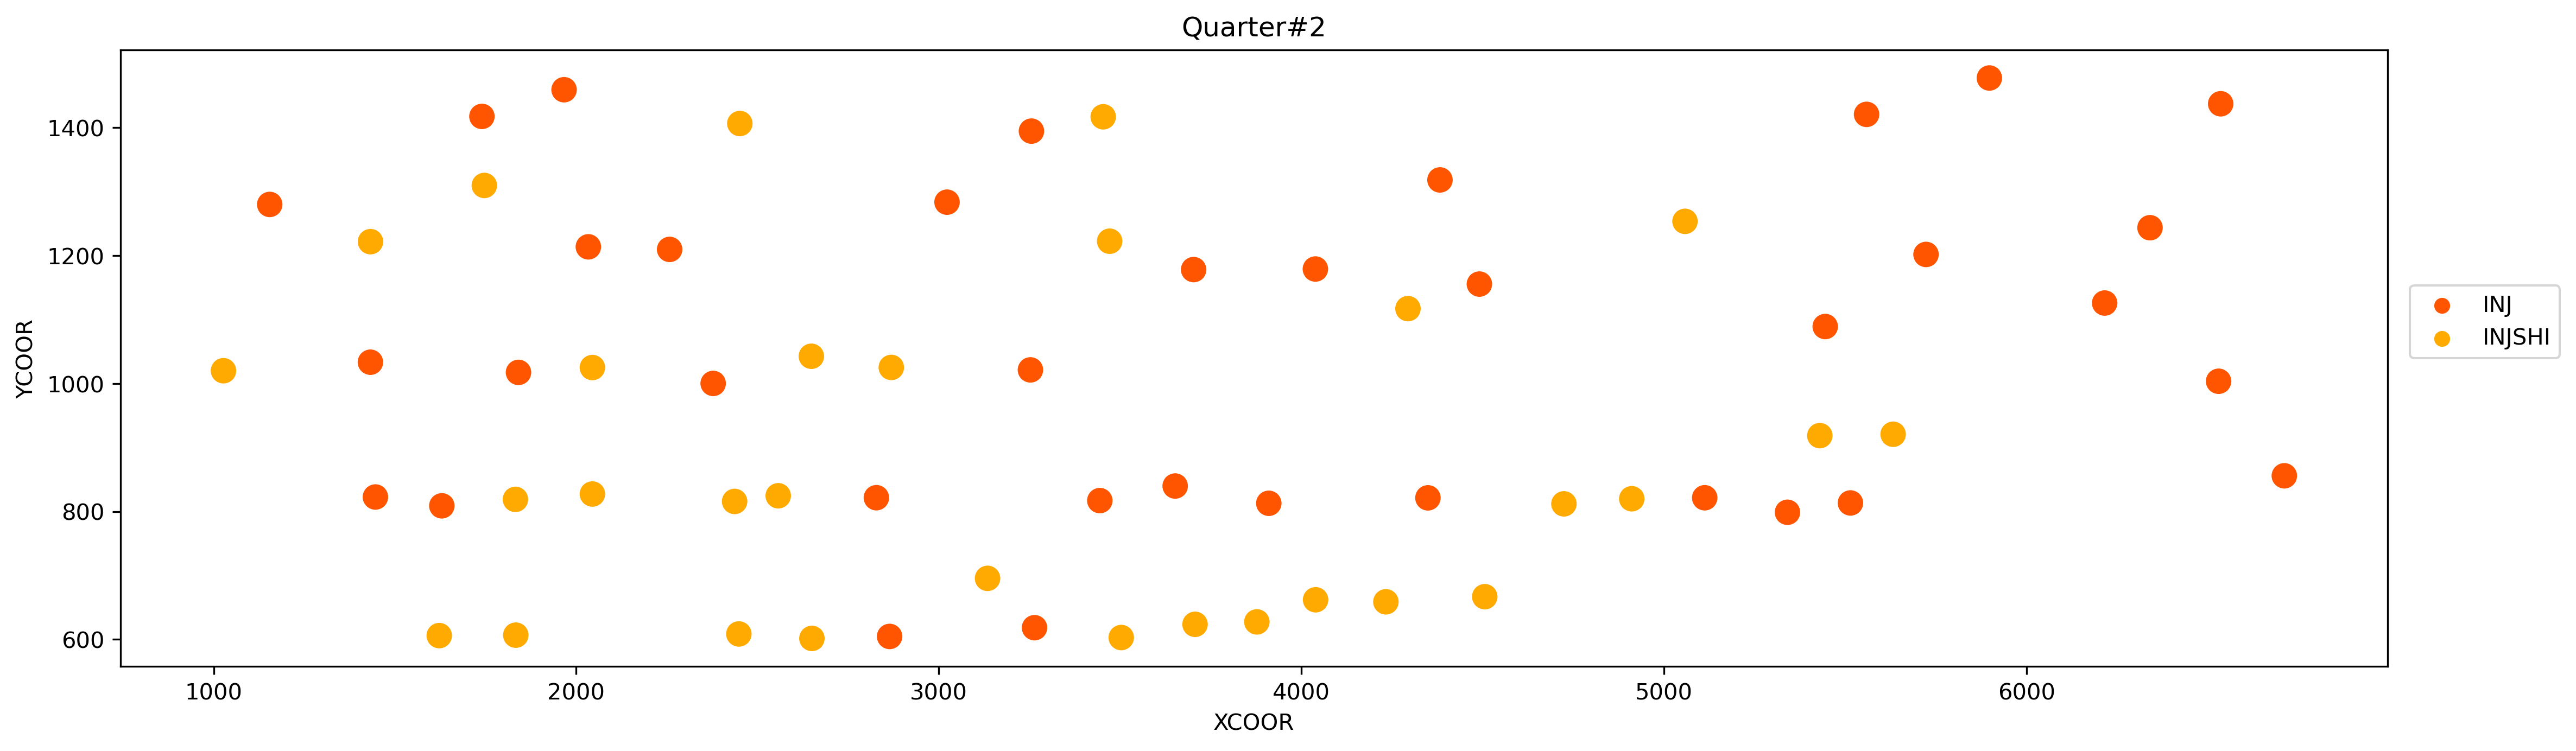

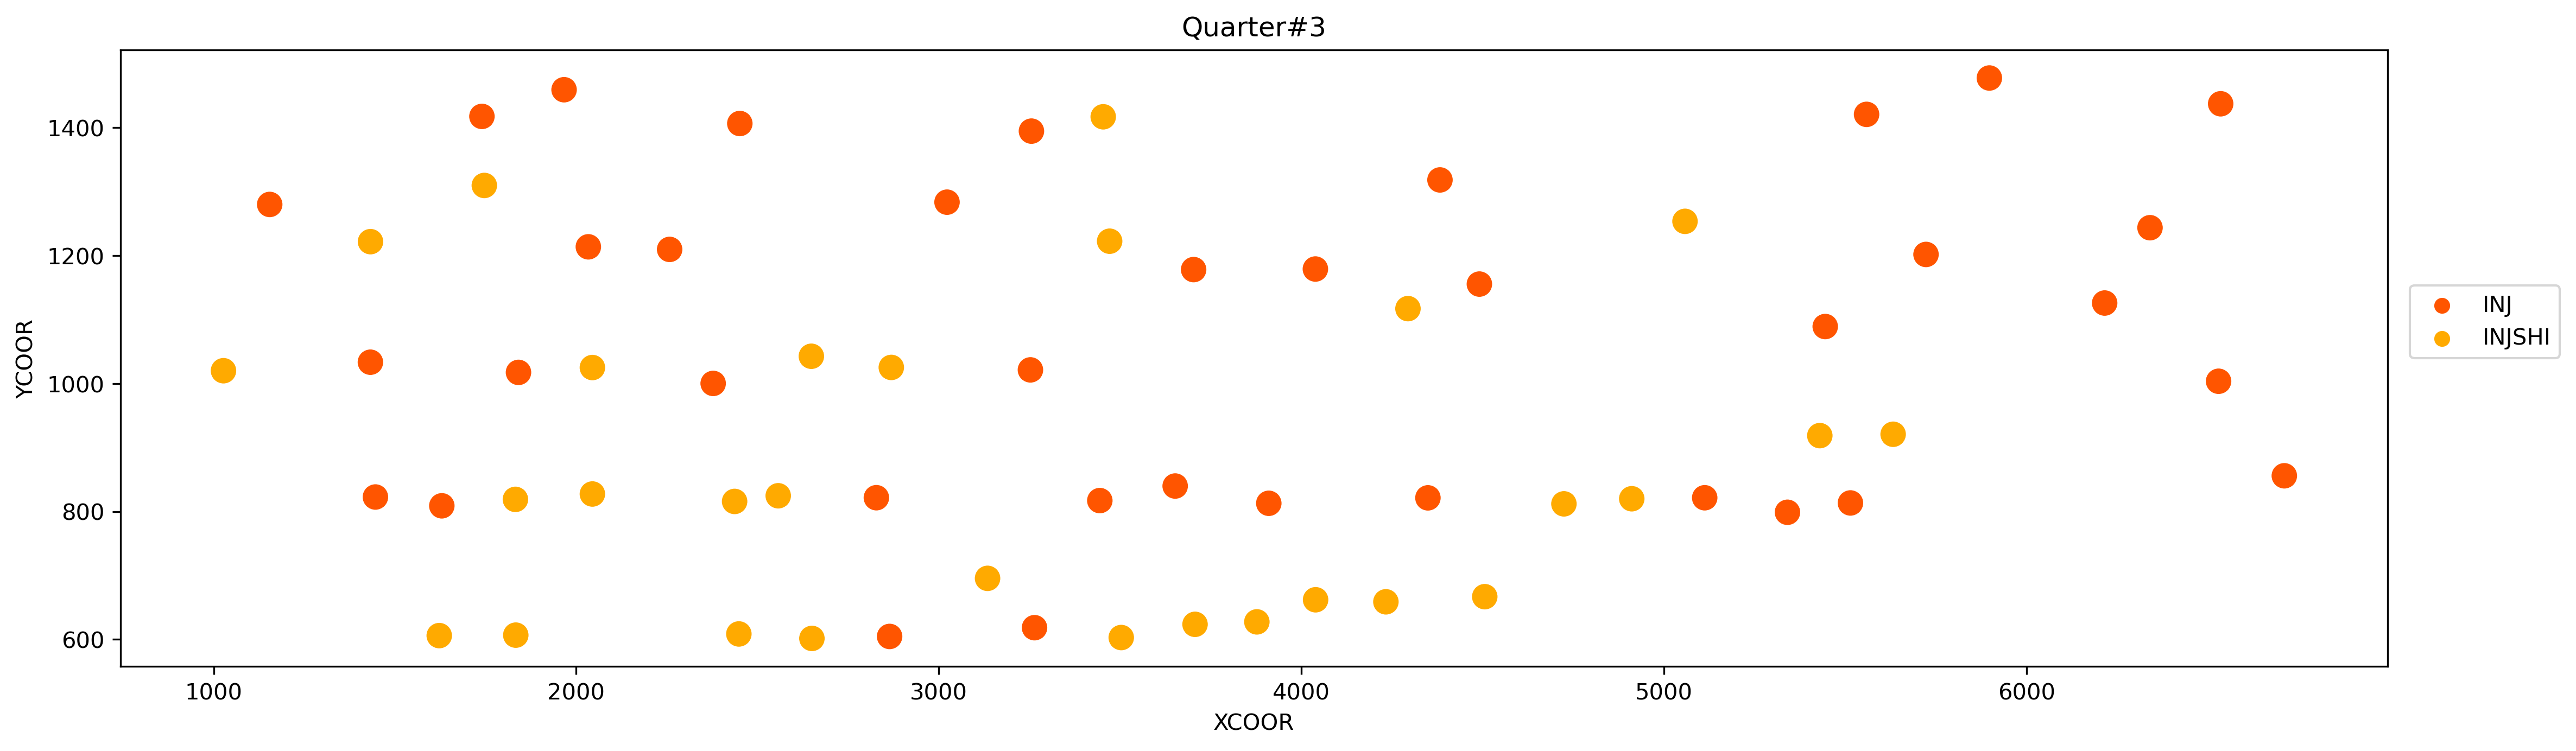

In [439]:

for quarter,date_ in quarter_tuples:
    
    df_CO2_INJ_Well = df_Header[df_Header.Status.isin(['INJ','INJSHI'])]['Well']
    df_inj = pd.DataFrame(data = dfce[dfce.Date_ == date_]['Well'].unique(),columns = ['Well'])
    df_inj['Status'] = 'INJ'
    inj = pd.merge(df_inj,df_CO2_INJ_Well,how='outer',on='Well')
    inj['Status'] = inj.Status.apply(lambda Status: 'INJSHI' if Status != 'INJ' else 'INJ')
    inj = pd.merge(df_Header[['Well','XCOOR','YCOOR']],inj,how='inner',on='Well')

    fig, ax = plt.subplots(figsize=(17.96,4.918),dpi=300)
    ax.set_title('Quarter#' + quarter)
    sns.scatterplot(
                    data = inj, 
                    x='XCOOR',
                    y='YCOOR',
                    hue='Status',
                    hue_order = ("INJ","INJSHI"),
                    s=150,
                    palette = 'autumn'
                    )
    plt.legend(loc = (1.01,0.5))


# Performance Comparison by Quarters

In [440]:
dfu = dfu[dfu.Date_ <=end_date]
dfcu = dfcu[dfcu.Date_ <=end_date]
dfce = dfce[dfce.Date_ <=end_date]
dfse = dfse[dfse.Date_ <=end_date]

In [441]:
dfu_1 = pd.merge(dfu,df_Header[['Well', 'XCOOR', 'YCOOR', 'EOR_Region', 'RF_Region', 'Facility']], how = 'inner', on = 'Well')
dfu_agg = dfu_1[dfu_1.Date_>=start_date].groupby(["EOR_Region","quarter"]).agg({'Monthly_Oil_Production_bbl':'sum'
                                                                        , 'Monthly_Water_Production_bbl' : 'sum'
                                                                        ,'Daily_Oil_Rate_bbl':'mean'
                                                                       , 'WC' : 'mean'
                                                                        , 'Well' : 'count'
                                                                       }).reset_index()
dfu_agg.EOR_Region = dfu_agg.EOR_Region.astype('int');
dfu_agg    


,EOR_Region,quarter,Monthly_Oil_Production_bbl,Monthly_Water_Production_bbl,Daily_Oil_Rate_bbl,WC,Well
0,1,1,8297,1458,17.299444,13.600000,18
1,1,2,10570,1215,20.693889,12.578889,18
2,1,3,10514,910,19.715000,9.351111,18
3,2,1,18493,14711,17.126053,42.637895,38
4,2,2,15823,12165,15.787105,44.132105,38
5,2,3,16663,10590,17.081515,34.108485,33
6,3,1,908,334,14.362500,39.087500,4
7,3,2,1487,526,16.243333,26.276667,3
8,3,3,1001,651,10.896667,36.290000,3
9,4,1,6570,5484,18.459231,48.432308,13


Text(0, 0.5, 'Quarterly Oil Production, bbl')

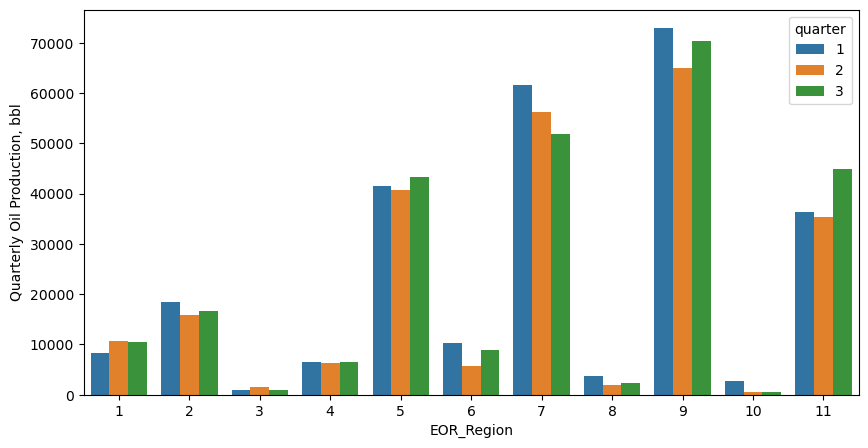

In [442]:
plt.figure(figsize = (10,5))
sns.barplot(data = dfu_agg, x = "EOR_Region", y = 'Monthly_Oil_Production_bbl', hue = "quarter" )
plt.ylabel('Quarterly Oil Production, bbl')

Text(0, 0.5, 'Quarterly Water Production, bbl')

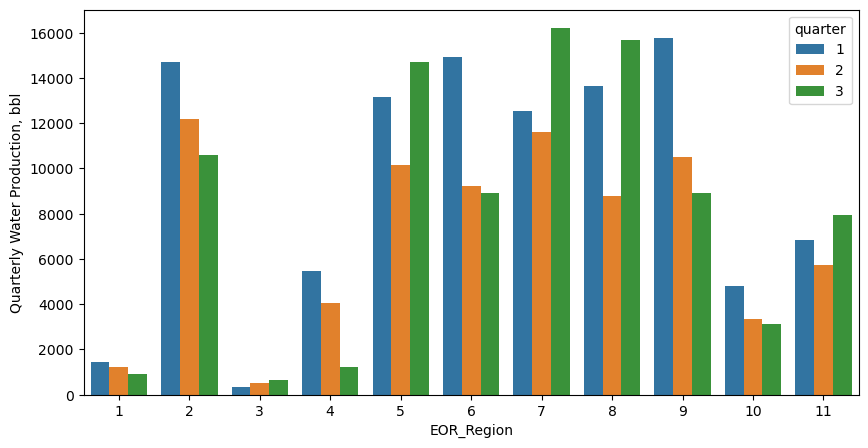

In [443]:
plt.figure(figsize = (10,5))
sns.barplot(data = dfu_agg, x = "EOR_Region", y = 'Monthly_Water_Production_bbl', hue = "quarter" )
plt.ylabel('Quarterly Water Production, bbl')

Text(0, 0.5, 'WC')

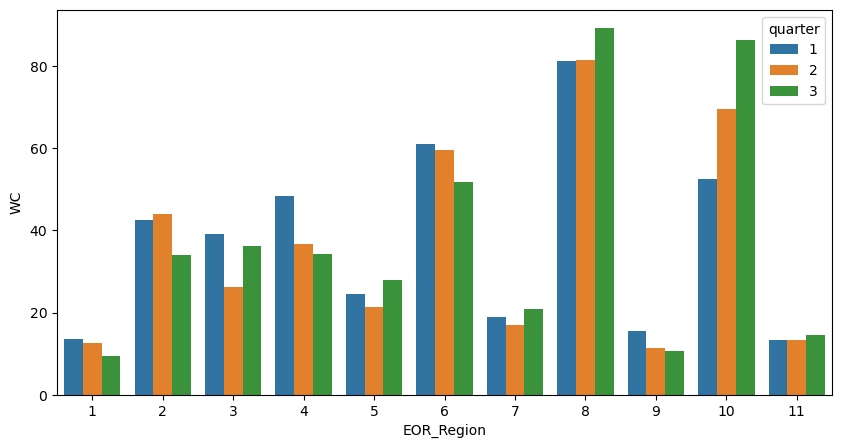

In [444]:
plt.figure(figsize = (10,5))
sns.barplot(data = dfu_agg, x = "EOR_Region", y = 'WC', hue = "quarter" )
plt.ylabel("WC")

In [445]:
dfcu_1 = pd.merge(dfcu,df_Header[['Well', 'XCOOR', 'YCOOR', 'EOR_Region', 'RF_Region', 'Facility']], how = 'inner', on = 'Well')
dfcu_agg = dfcu_1[dfcu_1.Date_>=start_date].groupby(["EOR_Region","quarter"])['Monthly_Gas_Production_Mscf'].sum().reset_index()
dfcu_agg.EOR_Region = dfcu_agg.EOR_Region.astype('int');

Text(0, 0.5, 'Quarterly Gas Production, Mscf')

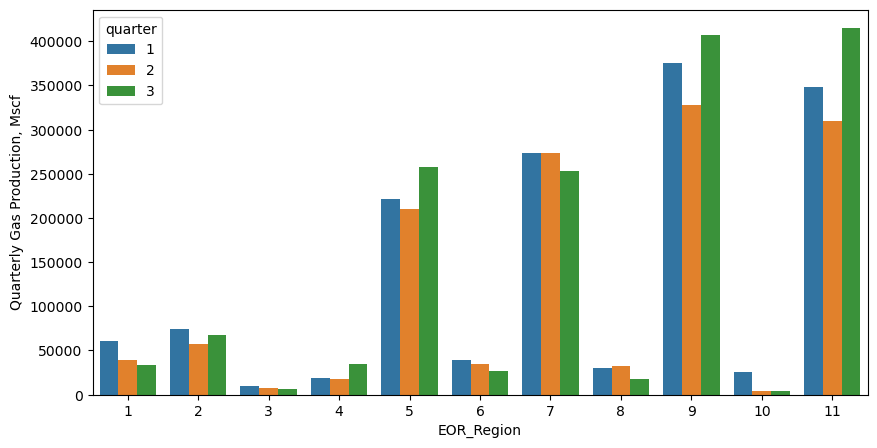

In [446]:
plt.figure(figsize = (10,5))
sns.barplot(data = dfcu_agg, x = "EOR_Region", y = 'Monthly_Gas_Production_Mscf', hue = "quarter" )
plt.ylabel('Quarterly Gas Production, Mscf')

In [447]:
dfce_1 = pd.merge(dfce,df_Header[['Well', 'XCOOR', 'YCOOR', 'EOR_Region', 'RF_Region', 'Facility']], how = 'inner', on = 'Well')
dfce_agg = dfce_1[dfce_1.Date_>=start_date].groupby(["EOR_Region","quarter"])['Monthly_Gas_Injection_MMscf'].sum().reset_index();
dfce_agg.EOR_Region = dfce_agg.EOR_Region.astype('int');

Text(0, 0.5, 'Quarterly Gas Injection, MMscf')

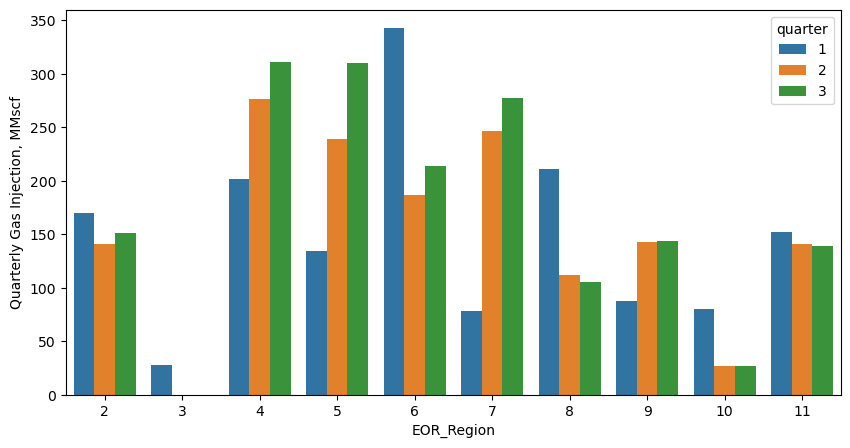

In [448]:
plt.figure(figsize = (10,5))
sns.barplot(data = dfce_agg, x = "EOR_Region", y = 'Monthly_Gas_Injection_MMscf', hue = "quarter" )
plt.ylabel('Quarterly Gas Injection, MMscf')

In [449]:
dfse_1 = pd.merge(dfse,df_Header[['Well', 'XCOOR', 'YCOOR', 'EOR_Region', 'RF_Region', 'Facility']], how = 'inner', on = 'Well')
dfse_agg = dfse_1[dfse_1.Date_ >= start_date].groupby(["EOR_Region","quarter"])['Monthly_Water_Injection_bbl'].sum().reset_index();
dfse_agg.EOR_Region = dfse_agg.EOR_Region.astype('int');

Text(0, 0.5, 'Quarterly Water Injection, bbl')

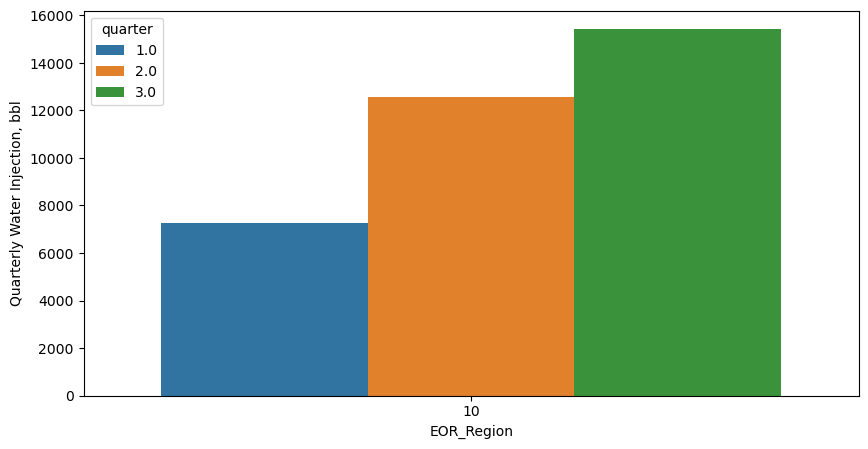

In [450]:
plt.figure(figsize = (10,5))
sns.barplot(data = dfse_agg, x = "EOR_Region", y = 'Monthly_Water_Injection_bbl', hue = "quarter" )
plt.ylabel('Quarterly Water Injection, bbl')

# Exploratory Data Aanalysis for the last month

In [451]:
dfu.columns

Index(['Well', 'Date_', 'Work_Days', 'Monthly_Oil_Production_bbl',
       'Monthly_Water_Production_bbl', 'Daily_Oil_Rate_bbl', 'WC',
       'Average_API', 'Pump_Type', 'month', 'year', 'days_in_month', 'quarter',
       'WC_Division'],
      dtype='object')

In [452]:
dfu

,Well,Date_,Work_Days,Monthly_Oil_Production_bbl,Monthly_Water_Production_bbl,Daily_Oil_Rate_bbl,WC,Average_API,Pump_Type,month,year,days_in_month,quarter,WC_Division
480,X A-4494,1981-09-01,26.00,12,1137,0.46,98.96,13.56,SRP,9,1981,30,3,80%-99%
481,X-4733,1981-09-01,30.99,359,70,11.58,16.32,11.80,SRP,9,1981,30,3,<=20%
482,X-4739,1981-09-01,30.99,300,427,9.68,58.73,12.00,SRP,9,1981,30,3,40%-60%
483,X-9312,1981-09-01,30.99,830,144,26.78,14.78,11.80,SRP,9,1981,30,3,<=20%
484,X-5076,1981-09-01,31.00,1213,164,39.13,11.91,11.70,PCP,9,1981,30,3,<=20%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79604,X-4604,1935-05-01,23.30,241,0,10.34,0.00,12.00,PCP,5,1935,31,2,<=20%
79605,X-898,1935-05-01,23.30,1153,24,49.48,2.04,12.10,SRP,5,1935,31,2,<=20%
79606,X-3979,1935-05-01,23.00,893,26,38.83,2.83,12.00,ARTEZYEN,5,1935,31,2,<=20%
79607,X-7292,1935-05-01,23.00,887,0,38.57,0.00,12.50,PCP,5,1935,31,2,<=20%


<Axes: xlabel='Daily_Oil_Rate_bbl', ylabel='Count'>

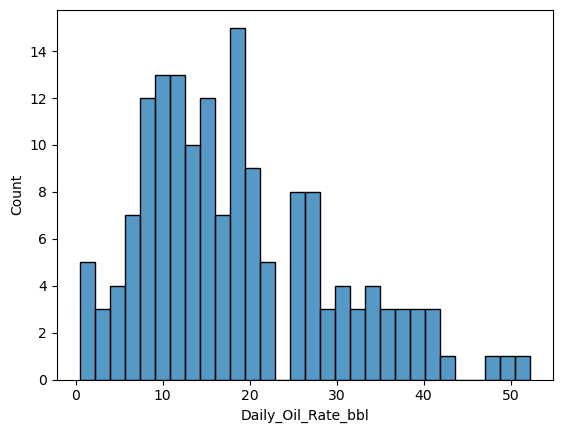

In [453]:
sns.histplot(data = dfu[(dfu.year== year_) & (dfu.month == last_month)],x = 'Daily_Oil_Rate_bbl',bins = 30)

<Axes: xlabel='WC', ylabel='Count'>

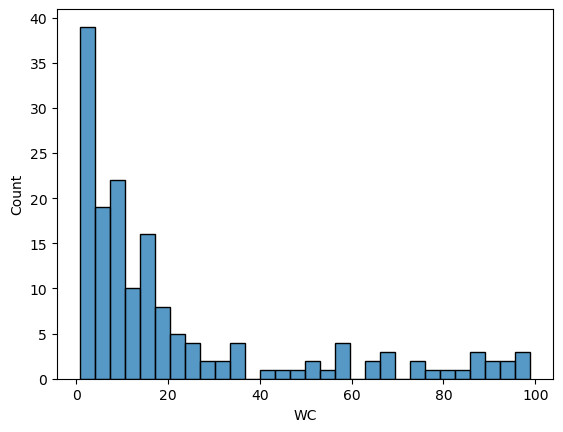

In [454]:
sns.histplot(data = dfu[(dfu.year== year_) & (dfu.month == last_month)],x = 'WC',bins = 30)

In [455]:
dfcu.columns

Index(['Well', 'Date_', 'Monthly_Gas_Production_Mscf',
       'Monthly_Water_Production_bbl', 'Daily_Gas_Production_Mscf', 'Pwh_psi',
       'Work_Days', 'Notes', 'month', 'year', 'quarter'],
      dtype='object')

<Axes: xlabel='Monthly_Gas_Production_Mscf', ylabel='Count'>

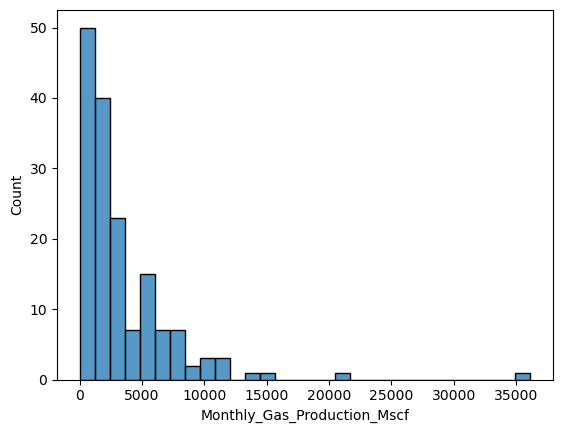

In [456]:
sns.histplot(data = dfcu[(dfcu.year== year_) & (dfcu.month == last_month)],x = 'Monthly_Gas_Production_Mscf',bins = 30)

In [457]:
dfcu[(dfcu.year== year_) & (dfcu.month == last_month) & (dfcu.Monthly_Gas_Production_Mscf > 20000)]

,Well,Date_,Monthly_Gas_Production_Mscf,Monthly_Water_Production_bbl,Daily_Gas_Production_Mscf,Pwh_psi,Work_Days,Notes,month,year,quarter
552,X-5842,1981-09-01,20661.8,26.0,690.1,NaN,29.94,NaN,9,1981,3
565,X-4755,1981-09-01,36160.5,90.0,1168.7,NaN,30.94,NaN,9,1981,3


In [458]:
df_Header[df_Header.Well == 'X-4065']

,Well,XCOOR,YCOOR,EOR_Region,RF_Region,Facility,Status
67,X-4065,5513.206004,1029.784118,9,dogu,F4,URT


In [459]:
dfce.columns

Index(['Well', 'Date_', 'Monthly_Gas_Injection_MMscf',
       'Daily_Gas_Injection_MMscf', 'Pwh_psi', 'Twh_C', 'Work_Days', 'Notes',
       'month', 'year', 'quarter'],
      dtype='object')

In [460]:
dfce["Monthly_Gas_Injection_scf"] = dfce.Monthly_Gas_Injection_MMscf*1e6

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


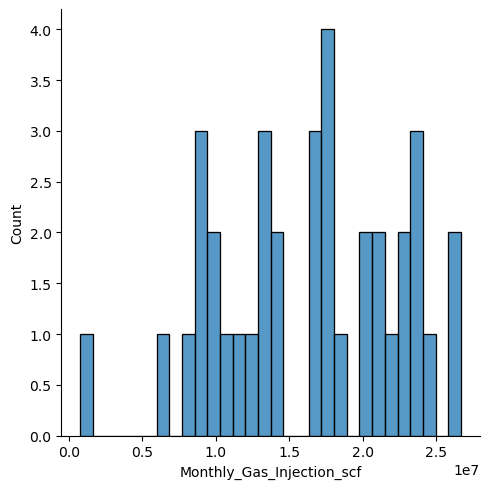

In [461]:
sns.displot(data = dfce[(dfce.year== year_) & (dfce.month == last_month)],x = 'Monthly_Gas_Injection_scf',bins = 30)